## Margins

- Mistake bounds for threshold functons in $\mathcal X = \mathbb R$ under a margin assumption.

- Mistake bounds for the perceptron algorithm under a margin assumption.

- Some simple functions have exponetially small margins.

__Recall__

Let $\mathcal H_{th}$ be the set of threshold functions on $\mathcal X = \mathbb R$

$\mathcal H_{th} = \{ x \mapsto sgn(r-x) : r \in \mathbb R \}$

For every Learning Algorithm there exists an $f_r \in \mathcal H_{th}$ and $x_1, x_2, \dots \in \mathcal X$ on which it predicts every label wrong.

_Proof idea_

(if a point is predicted to be positive then we move the threshold right and keep the threshold at the right. Otherwise, we moved to the left in the opposite direction, so we are always wrong.)

$ \large{-} \;\;\;\;\;\;\;\; x_2\bullet \;\;\;\;\;\;\;\;\;\;\;\; x_4\bullet \;\;\;\; x_3\bullet \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; x_1\bullet \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \large{+} \mathbb R$

How to avoid above phenomenon

__Assume inputs are fat from border__

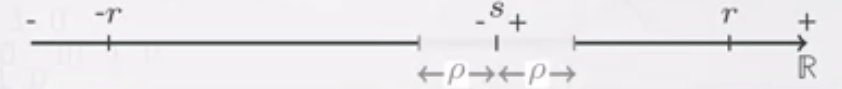

The ideas for a true threshold to only consider inputs that are some distance $\rho$ from the threshold. Then we can not converge geometrically close to the threshold. Under this assumption, we can give an algorithm that makes at most $r / \rho$ mistakes provided the input comes from points with absolute value at most $r$.

__Lemma__

Let $\mathcal X = [-r, +r] = \{x \in \mathbb R : -r  \le x \le r\}$ and $\rho > 0$. There exists an online algorithm that for each $f_s \in \mathcal H_{th}$ and each sequence $x_1,x_2,\dots \in \mathcal X$ with $|x_t-s| \ge \rho$ for all t. makes at most $\log_2(r / \rho)$ mistakes.

_Proof_

- Interval $I_t$ = set of points with unknown labels $I_1 = [-r, r]$ 

(At each step, we maintain an interval of points where we do not yet know the label. Initially this intervel is $[-r ,r]$, so each step, when we received a true label, we can decrease this interval)

- Predict -1 if the received point lay in left half of $I_t$, and +1 in right half.

- Mistakes $\implies |I_{t+1}| \le \frac{1}{2}|I_t|$ (when point with positive label lied in the left half of $I_t$ or vice versa. The interval will decrease more than half)

(this bound the number of mistakes that we can make. Because we know at any point our interval will be at least of size $2\rho$. It can never become smaller than $2\rho$ because we never receive a point that is closer to the true threshold than a distance $\rho$.)

$I_t \ge 2 \rho$ and $I_t \le \frac{1}{2^m} 2 r$

$\implies 2 \rho \le \frac{1}{2^m} 2 r \implies \frac{\rho}{r} \le 2^{-m} \implies m \le \log \frac{r}{\rho}$

So the mistake $m \le \log \frac{r}{\rho}$

## Perceptrons

### Halfspaces through the origin are enough

This simplifies notation

Let $u,v \in \mathbb R^p$

$u \cdot v = u_1v_1 + \cdots u_pv_p$

Append a 1 to each input vector $x \in \mathbb R^p$:

$x = \begin{bmatrix}x_1 \\ \vdots \\ x_p \end{bmatrix} \to \begin{bmatrix}x_1 \\ \vdots \\ x_p \\ 1 \end{bmatrix} = x^{'}$

$w \cdot x + b \to w^{'} \cdot x^{'}$

$w = \begin{bmatrix}w_1 \\ \vdots \\ w_p \end{bmatrix} \to \begin{bmatrix}w_1 \\ \vdots \\ w_p \\ b \end{bmatrix} = w^{'}$

Then any hyperplane that doesn't go through the origin can be written as $w \cdot x + b$.

After appending a one, we can define a hyperplane in one larger dimension. This hyperplane goes through the origin and takes precisely the same decisions on new test samples as the original one that does not go through the origin.

($w \cdot x + b = w_1x_1 + \cdots w_px_p + b\;\;\; w^{'} \cdot x^{'} = w_1x_1 + \cdots w_px_p + 1\cdot b$)

Hyperplane $w \leftrightarrow \{z : z \cdot w = 0\}$

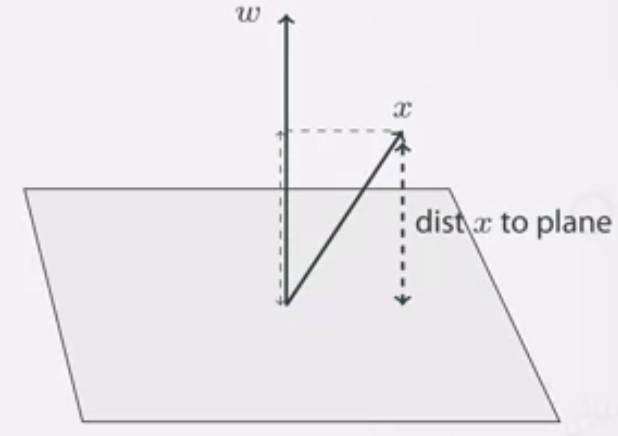

$\pm d(x, w) = e_w \cdot w = \frac{w \cdot x}{\|w\|}$

(this gives us a sign distance. The sign is very useful for us because the sign tells us on which side of the hyperplane we are. Let label be $\{-1, +1\}$, mutiply $d$ by the label, we want the result always be positive. )

__Theorem__

> There exists an online algorithm such that for all $v \in \mathbb R^p$ and all sequences $(x_1, y_1), (x_2, y_2), \dots \in \mathbb R^p \times \{-1, +1\}$ with $\frac{x_t \cdot v}{\|v\|}y_t \ge \rho$ and $\|x_t\| \le r$, makes ar most $(r/\rho)^2$ mistakes.

(The perceptron algorithm is an online algorithm, such that there exists a hyperplane that corrects all labels correctly with a margin $\rho$. If all inputs distance are at most $r$, then the algorithm makes at most $(r/\rho)^2$ mistakes.)

The bound is independent of the dimension $p$.

__Perceptron algorithm__

$\mathcal y \in \{-1, +1\}$

>$w_1 = $ zero vector
>  
>while True:  
>$\;\;\;\;$Reveive $x_t$  
>$\;\;\;\;$Predict $\hat{y}_t = sgn(x_t\cdot w_t)$  
>$\;\;\;\;$Reveive $y_t$  
>$\;\;\;\;$if $\hat{y}_t \ne y_t$  
>$\;\;\;\;$$\;\;\;\;$$w_{t+1} \gets w_t + y_t x_t$  
>$\;\;\;\;$else:  
>$\;\;\;\;$$\;\;\;\;$$w_{t+1} \gets w_t$  

Go over all points and if a point is misclassified, then a point is added or subtracted depending on the label.

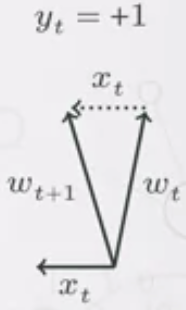

Above pic shows at some time, we have a vector $w_t$, and received $x_t$, predicted label -1, and the true label is +1. So we add $x_t$ to $w_t$

_Proof_

If $\frac{x_t \cdot v}{\|v\|}y_t \ge \rho$ and $\|x_t\| \le r$, then the perceptron algorithm makes at most $M \le (r/ \rho)^2$ mistakes.

(a). $M \rho \le \|w_{T+1}\|$

Let $E$ = set of $t$ where Perceptron algorithm predicts wrongly. $M=|E|$

Since $\frac{x_t \cdot v}{\|v\|}y_t \ge \rho$, we have $M \rho \le \sum_{t \in E}y_t\large \frac{x_t \cdot v}{\|v\|} = (\sum_{t \in E} y_t x_t) \cdot \frac{v}{\|v\|}$

Note that $(\large \sum_{t \in E} y_t x_t) \cdot \frac{v}{\|v\|}$ is a vector multiply a unit vector, so the product is bound by norm of the first vector. 

$\large  (\sum_{t \in E} y_t x_t) \cdot \frac{v}{\|v\|} \le \|\sum_{t \in E} y_t x_t\|$

And $\sum_{t \in E} y_t x_t$ is percisely $w_{t+1}$. (if $\hat{y}_t \ne y_t$ $\;\;$ $w_{t+1} \gets w_t + y_t x_t$  )

$\implies M \rho \le \|\sum_{t \in E} y_t x_t\| = \|w_{T+1}\|$

(b). $\|w_{T+1}\|^2 \le Mr^2$

First prove $\|w_{t+1}\|^2 \le \|w^t\|^2 + \|w^t\|^2$

Assume $t \in E$

$ \|w_{t+1}\|^2 =  \|w_t + y_tx_t\|^2 = \|w_t\|^2 + 2 y_t(x_t \cdot w_t) + \|w_t\|^2$

The above happends only when PA predicted wrongly, it means the sign of $y_t$ and $(x_t \cdot w_t)$ are different.

Hence $\|w_{t+1}\|^2 \le \|w^t\|^2 + \|w^t\|^2$

$\|w_{T+1}\|^2 = \sum_{t \in E} \|w_{t+1}\|^2 - \|w_t\|^2 \le \sum_{t \in E} \|x_t\|^2 \le Mr^2$

$\implies \|w_{T+1}\|^2 \le Mr^2$

Put $a^2$ and $b$ together $M^2\rho^2 \le Mr^2 \implies M \le (r/\rho)^2$

_source svivek_

### The Perceptron algorithm

Input: A sequence of training examples $(x_1, y_1), (x_2, y_2), \dots$ where $x_i \in \mathbb R^d, y \in \{-1, +1\}$

1. Initialize $w_0=0 \in \mathbb R^d$
2. For each training example $x_i, y_i$
    1. Predict $\hat{y} = sgn(\mathbf{w}^T_t \mathbf{x}_t)$
    2. if $\hat{y} \ne y_i$:
        - Update $\mathbf{w}_{t+1} \gets \mathbf{w}_t + r(y_i \mathbf{x}_i)$
3. Return final vector

Mistake on positive: $\mathbf{w}_{t+1} \gets \mathbf{w}_t + r \mathbf{x}_i$  
Mistake on negative: $\mathbf{w}_{t+1} \gets \mathbf{w}_t - r \mathbf{x}_i$  

$r$ is the learning rate, a small positive number less than 1  

Update only on error. A mistake-driven algorithm

Mistake can be written as $y_i \mathbf{w}^T_t \mathbf{x}_i) \le 0$. (Maybe this means $\|w_{t+1}\|^2 \le \|w^t\|^2 + \|w^t\|^2$, the scalar is decreasing as we make mistakes)

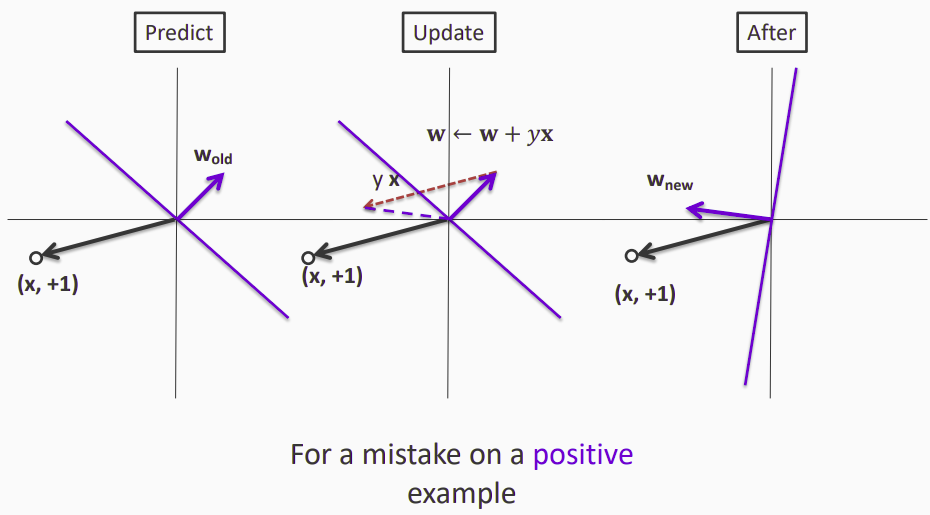

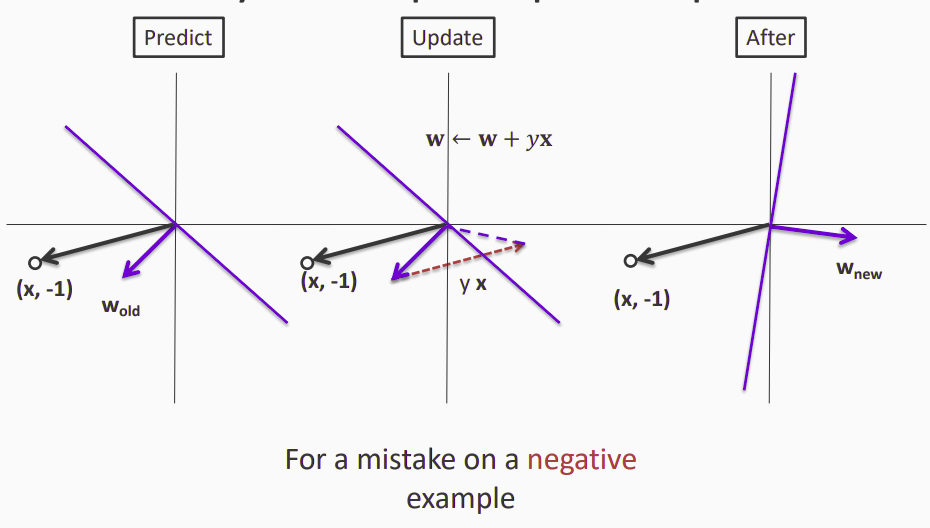

_end source svivek_

__example__

>Let $\mathcal{X} = \{-1, 0, 1\}^p \setminus \{0^p\}$. 
>Let $\mathcal y = \{-1, +1\}$. 
>Let $h$ be the right-most nonzero function that maps each string $x \in \mathcal{X}$ to the value of its right-most nonzero coordinate. Thus
>
><center>$h(x)=x_{max\{i:|x_i|=1\}}$</center>
>
>In the previous quiz we showed that a separating hyperplane $w \in \mathbb{R}^p$ exists. Now we show that the perceptron algorithm makes at least an exponential number of mistakes in $p$ before it finds a separating hyperplane. 
>
> Is the followingn claim true?
> The hyperplane $w$ computed by the perceptron algorithm in this problem is always integer, regardless in which order points of $\mathcal X$ are presented. 

Yes it is true.

>Prove that your answer is true. (1-2 sentences.)

If $\hat{y}_t \ne y_t$ then $w_{t+1} \gets w_t + y_t \cdot x_t$ where $\mathcal Y = \{-1, +1\}, \mathcal{X} = \{-1, 0, 1\}^p \setminus \{0^p\}$, the coordinates in all vectors are integer, vector multiply by a integer, the coordinates remain integer. Thus the hyperplane is always integer.

>Prove that if we feed all points of $\mathcal X$ to the perceptron algorithm repeatedly in any order, then the algorithm makes at least $2^{n-1}$ mistakes before finding a separating hyperplane. 
>
>Hint: inspect the largest coordinate of $w$. How much does it increase at each mistake?

_Proof_

Since the right-most nonzero coordinate decide the sign of $\hat{y}_t$, and the coordinates $x_i \in \{-1, 0, 1\}$ it means any coordinate in $\mathbf w$ must strictly larger than the sum of coordinates to its left.

$\mathbf w_{t,i+1} > \sum^i_{j=1}\mathbf w_{t,j} $

If $\mathbf w_{t,1} = 0$, then for cases like (1,0,0) and (-1,0,0), $\mathbf w_t \cdot \mathbf x_t = 0$. Thus $\mathbf w_{t,1} \ne 0$, and we already proved all coordinates in $\mathbf w$ is integer. 

$\mathbf w_{t,1} \ge 1$ and $\mathbf w_{t,1} \in \mathbb N$

$\implies \mathbf w_{t,2} \ge \mathbf w_{t,1} + 1 = 2$

$\implies \mathbf w_{t,3} \ge \mathbf w_{t,2} + \mathbf w_{t,1} + 1 = 4$

$\dots$

$\implies \mathbf w_{t,p} \ge \mathbf w_{t,p-1} +\cdots+ \mathbf w_{t,2} + \mathbf w_{t,1} + 1 = 2^{p-1}$

In the perceptron algorithm, If $\hat{y}_t \ne y_t$ then $\mathbf w_{t+1} \gets \mathbf w_t + y_t \cdot \mathbf x_t$. 

If the right-most coordinate of $\mathbf x_t$ is non-zero, $\mathbf w_{t,p}$ increased by 1. 

Besides the right-most coordinate, there are arbitrary number of non-zero coordinate to the left.  

Assume when $\mathbf w_{t,p}$ accumulated to $2^{p-1}$, the rest of the coordinates in $\mathbf w_t$ also satisfy "strictly larger than the sum of coordinates to its left". 

The algorithm makes at least $2^{p-1}$ mistakes to find such separating hyperplane.

> Explain why you can conclude that any separating hyperplane in this problem has an exponentially small margin. Give an explicit upperbound on the margin size?

_Theorem: There exists an online algorithm such that for all $v \in \mathbb R^p$ and all sequences $(x_1, y_1), (x_2, y_2), \dots \in \mathbb R^p \times \{-1, +1\}$ with $\frac{x_t \cdot v}{\|v\|}y_t \ge \rho$ and $\|x_t\| \le r$, makes ar most $(r/\rho)^2$ mistakes._

Upper bound of mistakes $M \le (r/\rho)^2$

In previous step, we proved $M \ge 2^{p-1}$

$r \ge \| \mathbf x_t \| = \sqrt{\sum^p_{i=1}1} = \sqrt{p}$

Put above three inequality together

$2^{p-1} \le \large \frac{p}{\rho^2} \implies \rho^2 \le \large \frac{p}{2^{p-1}} \implies \rho \le \sqrt{\large \frac{p}{2^{p-1}}}$

The upper bound on the margin size is $\sqrt{\large \frac{p}{2^{p-1}}}$